<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/4)_china_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_chinagdp=files.upload()

Saving china_gdp.csv to china_gdp.csv


In [ ]:
import pandas as pd

gdp_df = pd.read_csv('china_gdp.csv')
gdp_df.head()


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
print(gdp_df.isnull().sum())
print(gdp_df.dtypes)


Year     0
Value    0
dtype: int64
Year       int64
Value    float64
dtype: object


In [ ]:
X = gdp_df[['Year']]  # Features must be 2D, so use double brackets to keep as DataFrame
y = gdp_df['Value']   # Target variable


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)  # You can try degree=2,3,4...
X_poly = poly.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')


R²: 0.9679
MSE: 211190810575408879108096.0000


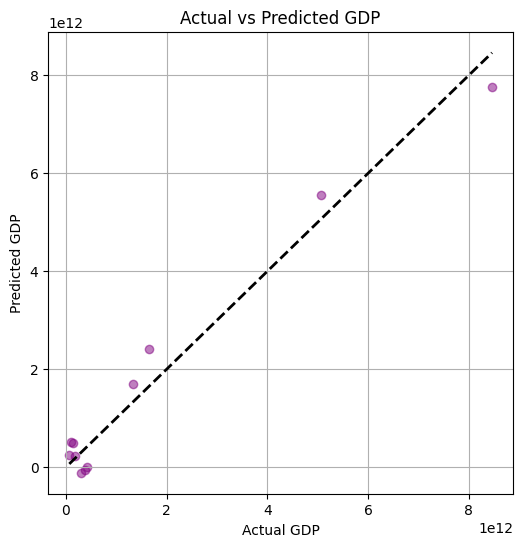

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.grid(True)
plt.show()
